In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

matplotlib.rcParams['figure.dpi'] = 150

In [3]:
samplerate, wav2 = wavfile.read('chicks/short.wav')
wav = wav2[:,0]
wav2.shape, wav.shape

((53843, 2), (53843,))

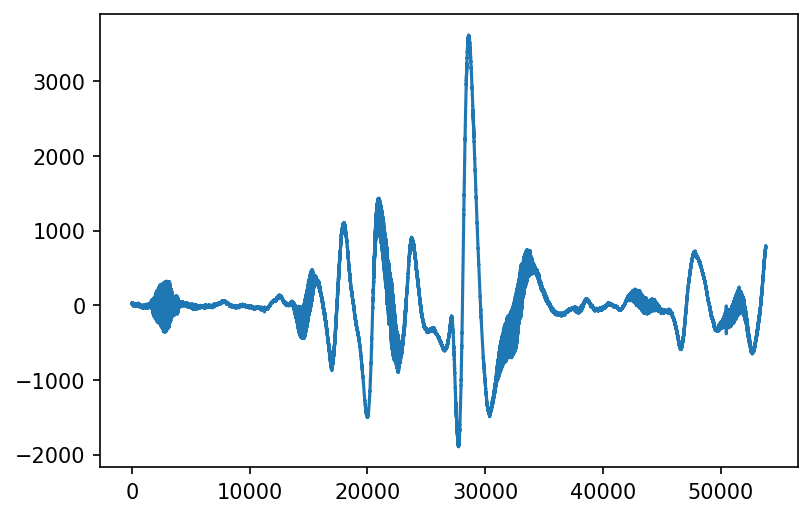

In [4]:
plt.plot(wav)

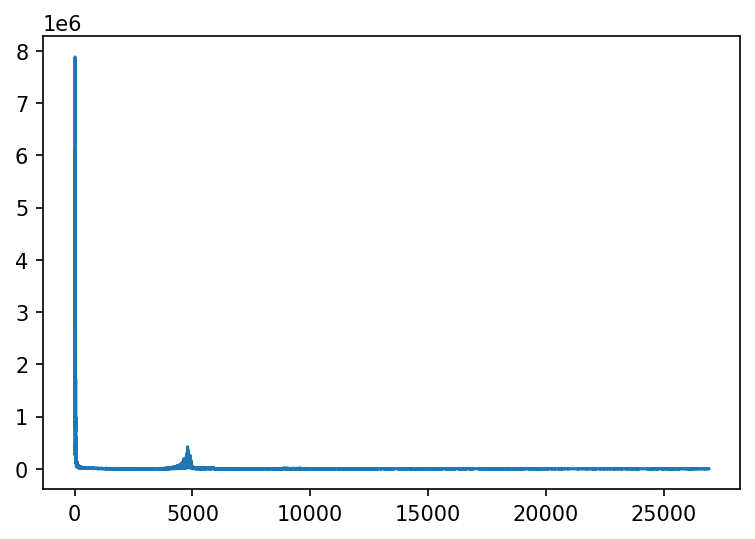

In [6]:
# This is the core of fft code; it doesn't have proper scale along x and/or y axis.
fft = np.fft.fft(wav)
fft = np.abs(fft)
plt.plot(fft[1: len(fft)//2])

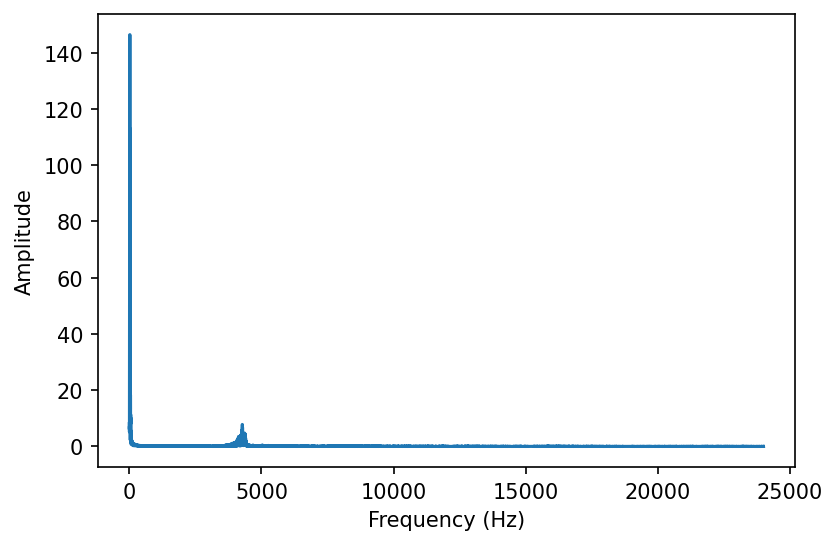

In [7]:
# Full FFT code which gives meaning to X and Y axis
N = len(wav)  # Total number of samples
T = 1/samplerate  # Time between samples
freqs = np.fft.fftfreq(N, d=T)  # Array of frequencies
freqs = freqs[:N//2]  # Keep only positive frequencies
fft = np.fft.fft(wav) / N  # Compute the FFT and normalize the result
fft = abs(fft[:N//2])  # Keep only the positive frequencies
plt.plot(freqs, fft)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [16]:
# Spectrogram

# load the long audio file

samplerate, wav2 = wavfile.read('chicks/audio/0.wav')
wav = wav2[:,0]
wav.shape
wav = wav[:1000000]

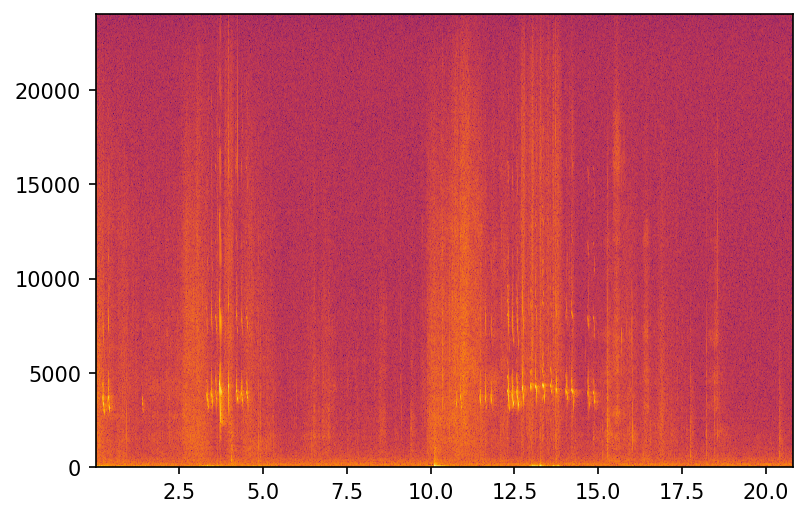

In [17]:
fs = samplerate  # Sample rate
nperseg = 1024  # Number of samples per segment

noverlap = nperseg // 2  # Overlap between segments
nfft = 4096  # Number of points in FFT

# Calculate the spectrogram
f, t, Sxx = signal.spectrogram(wav, fs=fs, window='hann', nperseg=nperseg, noverlap=noverlap, nfft=nfft)

# Plot the spectrogram
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='inferno')

In [19]:
total = np.sum(Sxx, axis=0)

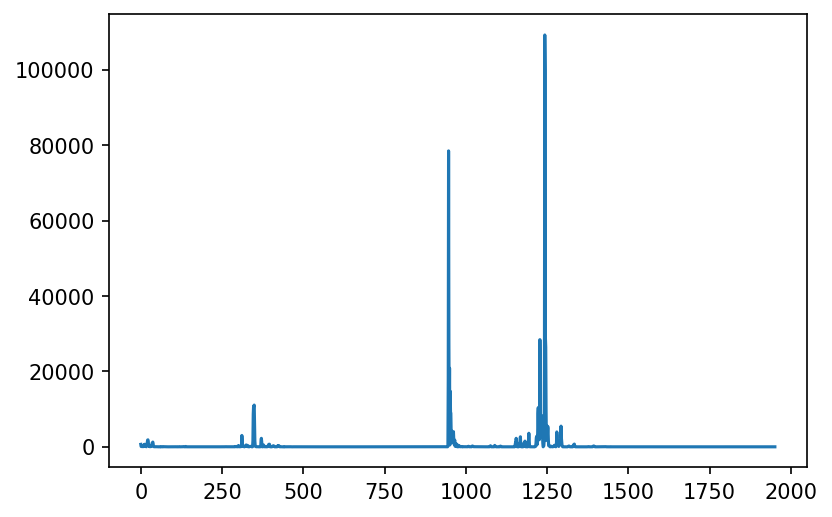

In [20]:
plt.plot(total)

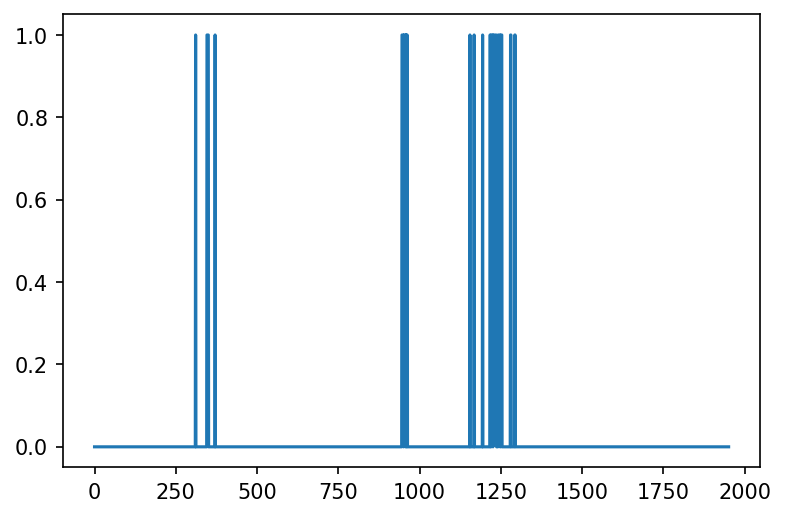

In [21]:
plt.plot( total > 2000)